In [2]:
import cv2
import sys
sys.path.append("../")
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
from joblib import Parallel, delayed
from multiprocessing import Pool
import torch
import os

from data.kitti_semantic import Kitti360Semantic, Kitti360Semantic1Hot, Kitti360SemanticAllClasses, Kitti360Semantic1HotAdv

In [10]:
dataset = Kitti360Semantic(data_dir="/media/namrata/Data/data/kitti-360/data_2d_semantics/train", sample_size=None, crop_size=512)

In [11]:
len(dataset)

51377

In [12]:
import kornia.geometry as K

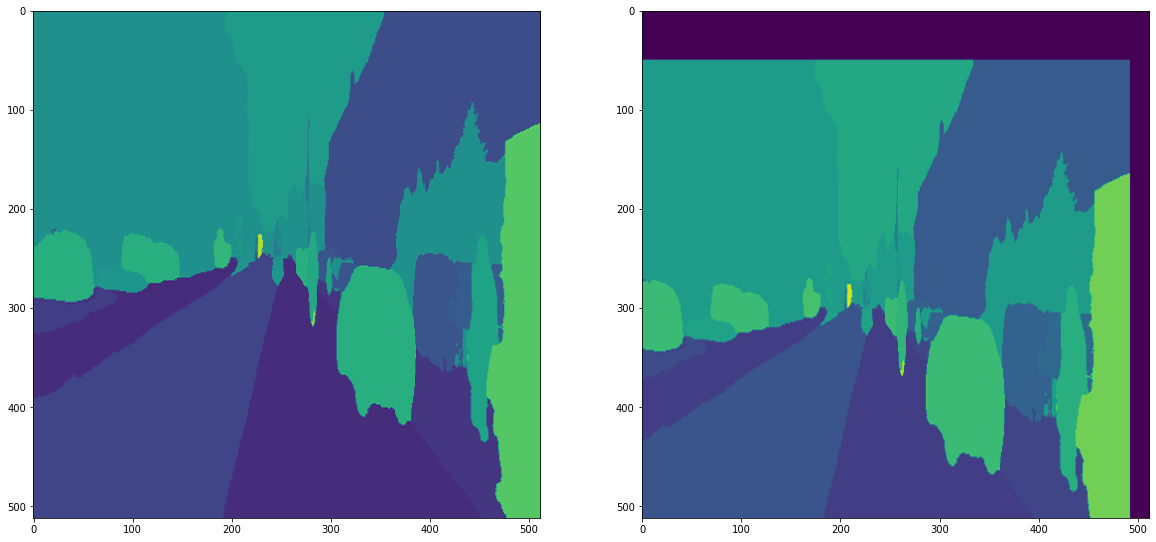

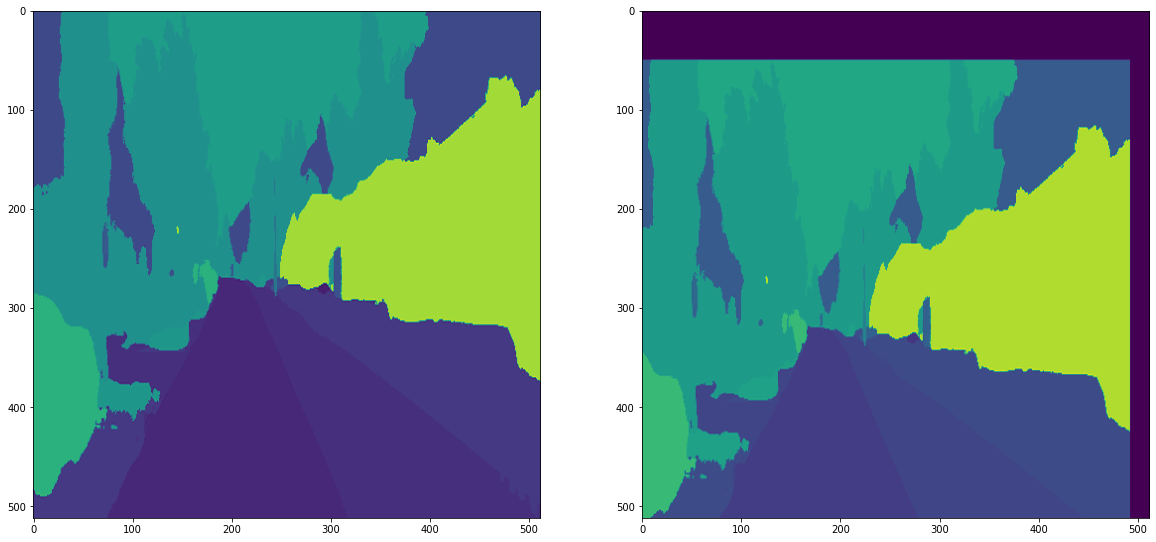

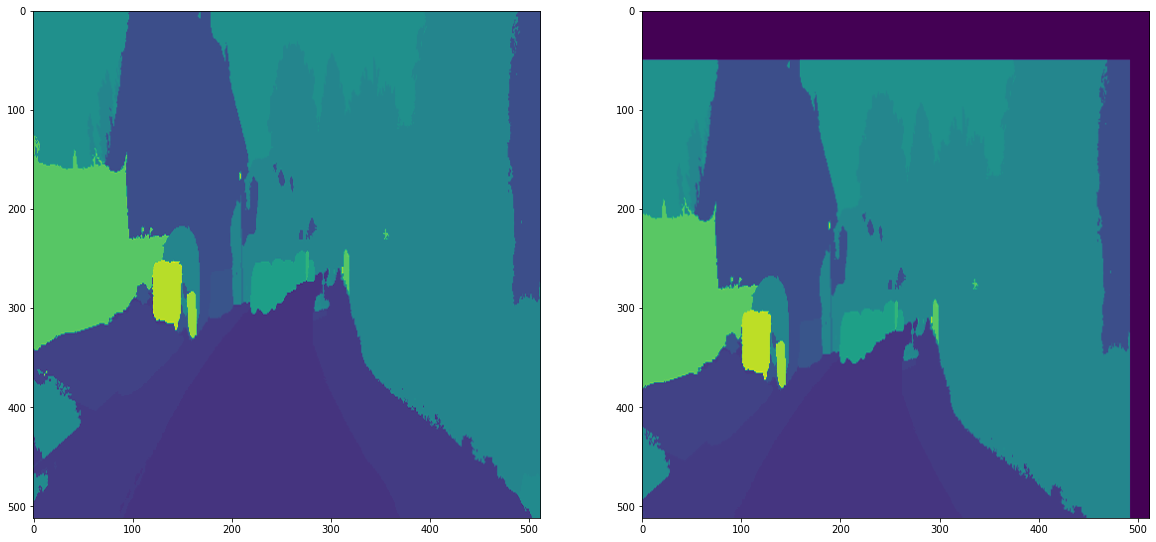

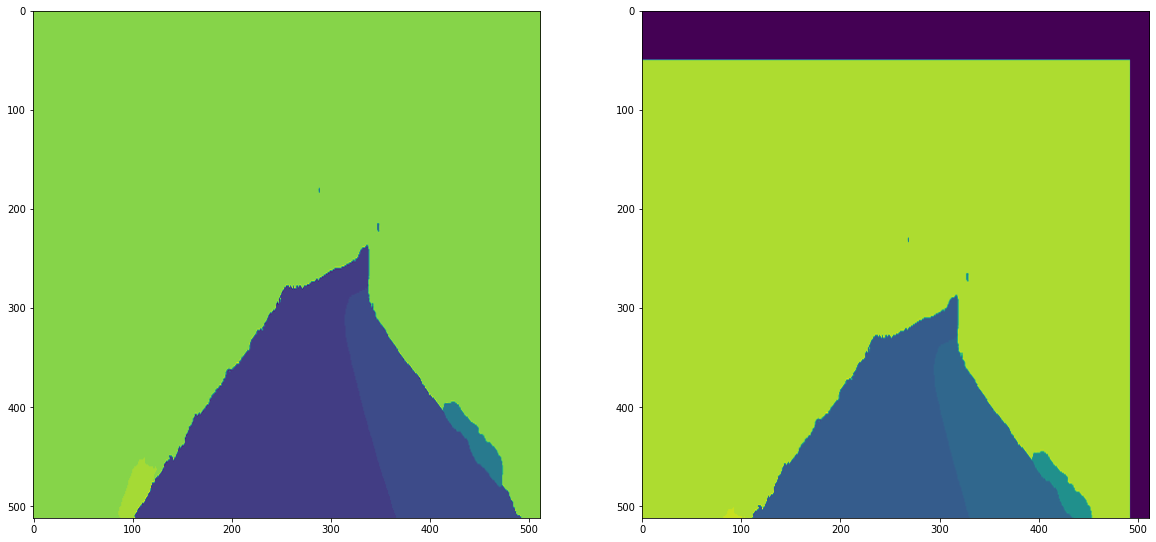

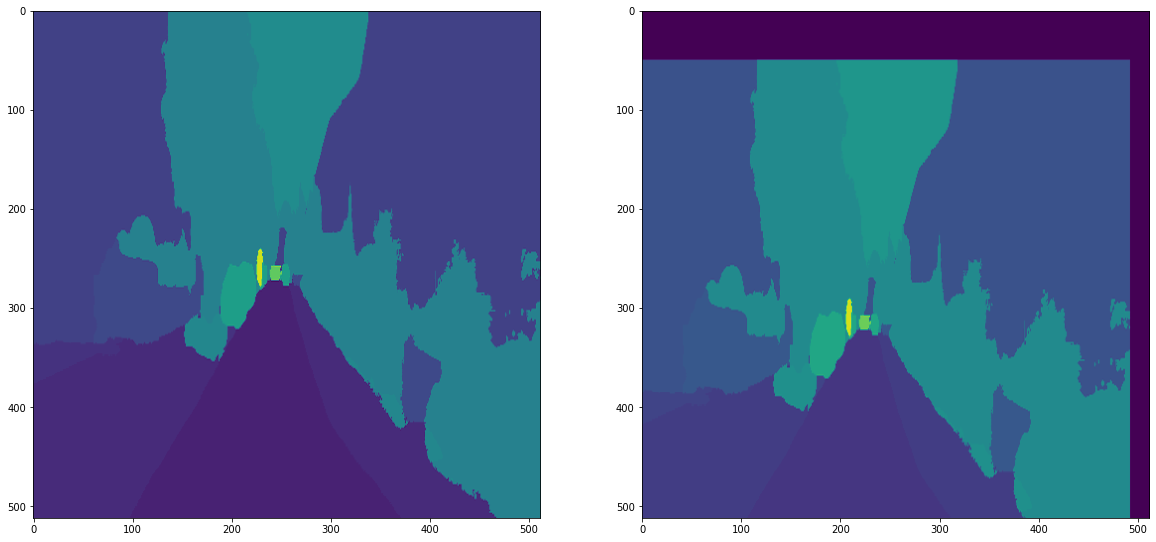

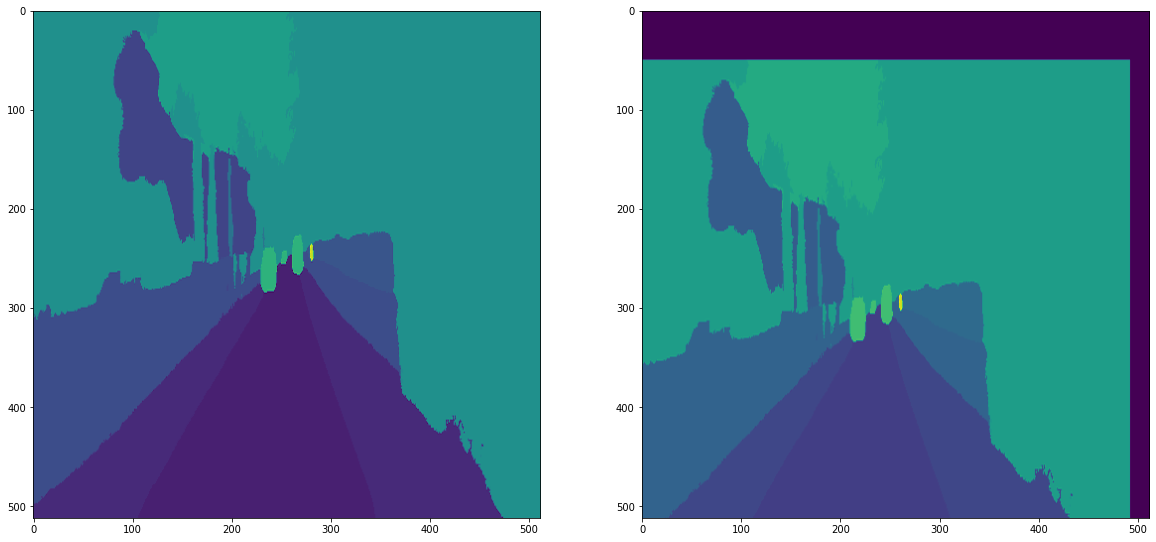

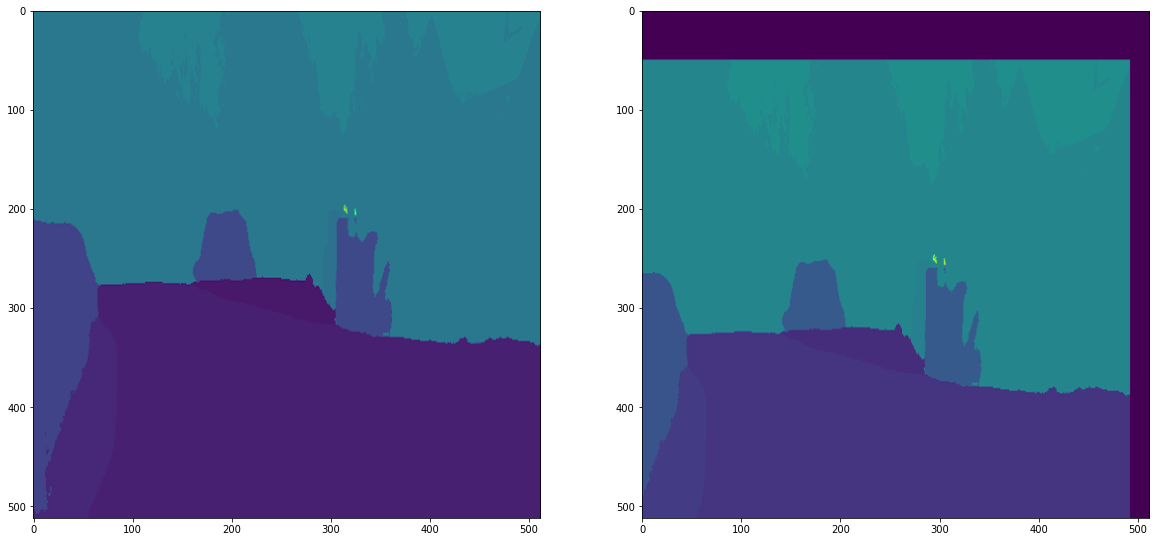

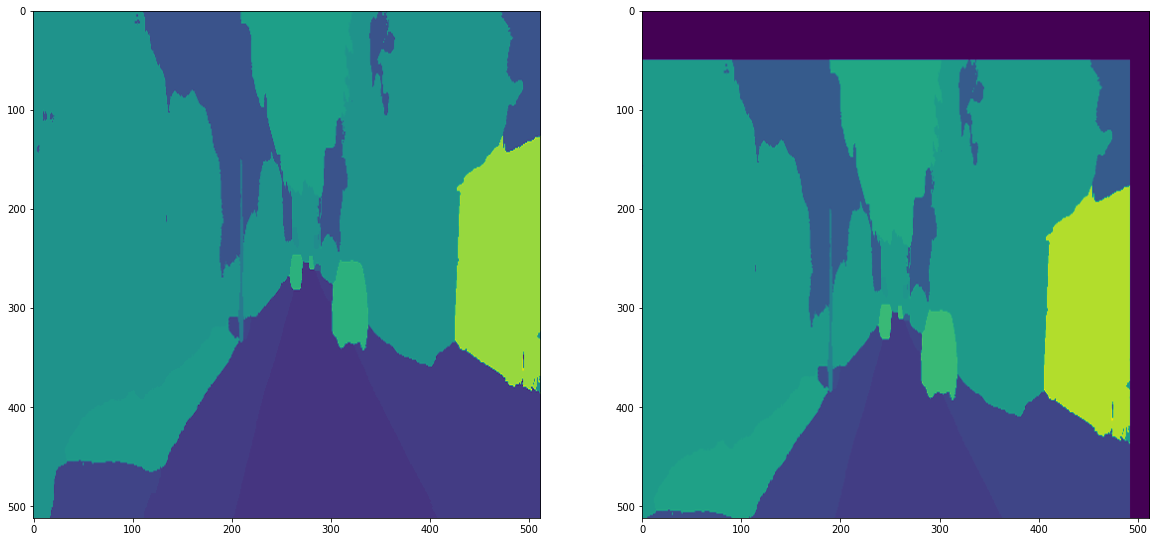

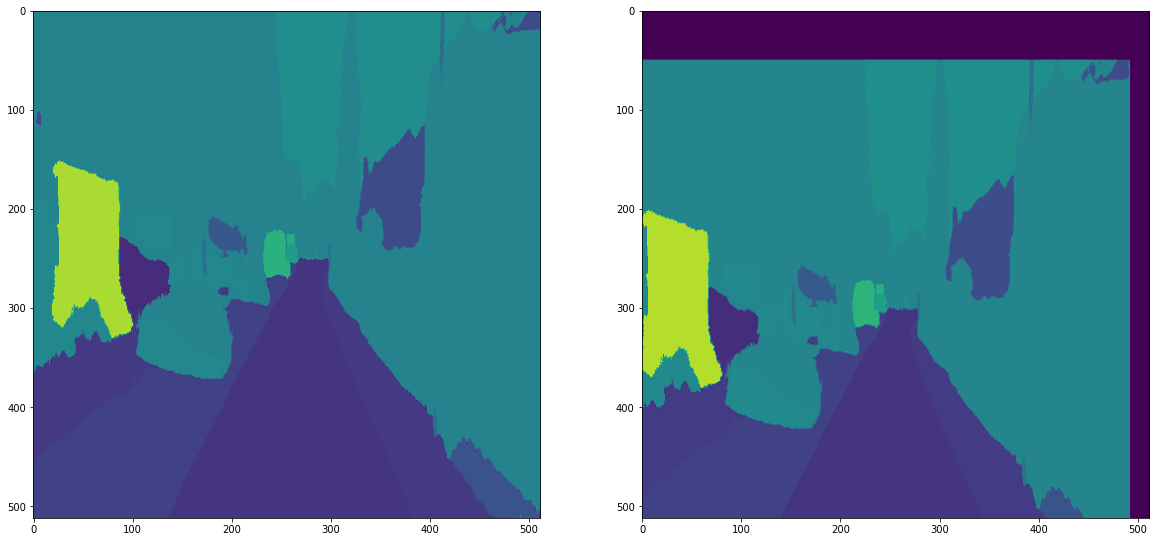

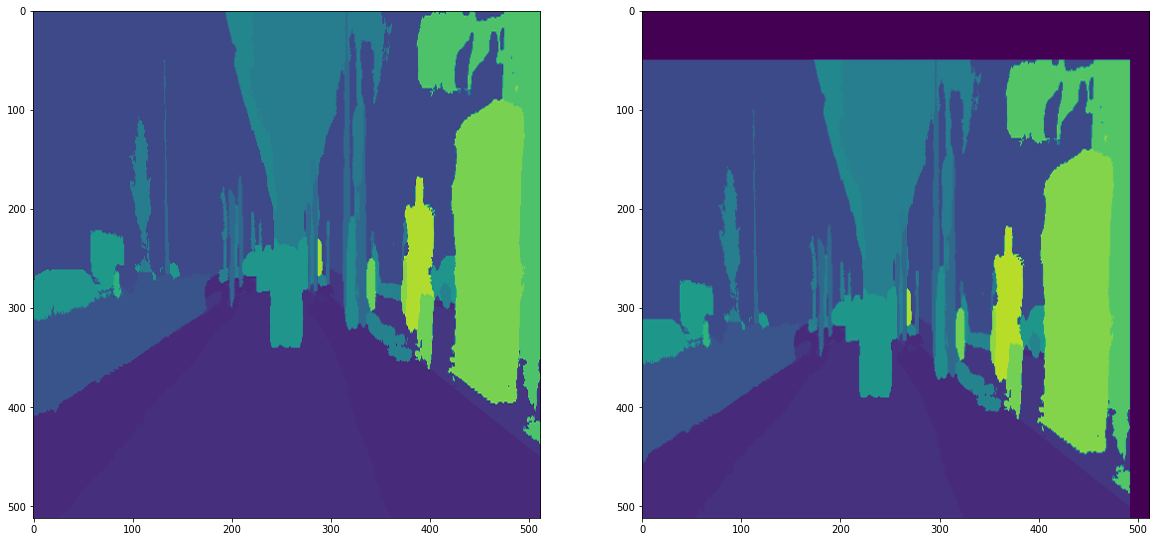

In [29]:
for i in range(10):
    mask = dataset[np.random.randint(len(dataset))]['mask'].permute(1, 2, 0)
    plt.subplot(121)
    plt.imshow(mask)
    img = mask.numpy()
    img = cv2.resize(img, (1408, 376), interpolation=cv2.INTER_AREA)
#     import pdb; pdb.set_trace()
    shifted = K.translate(mask.permute(2, 0, 1), torch.tensor([[-20., 50.]]))
    plt.subplot(122)
    plt.imshow(shifted.permute(1, 2, 0))
    plt.show()

In [ ]:
crop_size = 512
dataset = Kitti360Semantic1Hot(data_dir="/media/namrata/Data/data/kitti-360/data_2d_semantics/train", sample_size=None, crop_size=crop_size)
len(dataset)

In [3]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 20, 20

print("len of dataset = {}".format(len(dataset)))

for i in range(1):
    image_classified = dataset[np.random.randint(len(dataset))]
    print('data address is ={}'.format(image_classified['addr']))

    plt.subplot(231)
    image = cv2.imread(
        os.path.dirname(image_classified['addr']) + '_rgb/' + os.path.basename(image_classified['addr']))
    image = cv2.resize(image, (crop_size, crop_size), interpolation=cv2.INTER_NEAREST)
    plt.imshow(image)
    plt.title('image', fontsize=25)

    plt.subplot(232)
    plt.imshow(image_classified['mask_in'].permute(1,2,0))
    plt.title('mask_in', fontsize=25)

    plt.subplot(233)
    plt.imshow(image_classified['mask_out'])
    plt.title('mask_out', fontsize=25)

    subplot_id = 234
    for key in image_classified['mask_per_category'].keys():
        plt.subplot(subplot_id)
        plt.imshow(torch.squeeze(image_classified['mask_per_category'][key]))
        plt.title(key, fontsize=25)
        subplot_id += 1
    plt.show()

51377

len of dataset = 51377
data address is =../../Datasets/Kitti360/data_2d_semantics/train\2013_05_28_drive_0009_sync\semantic\0000006367.png


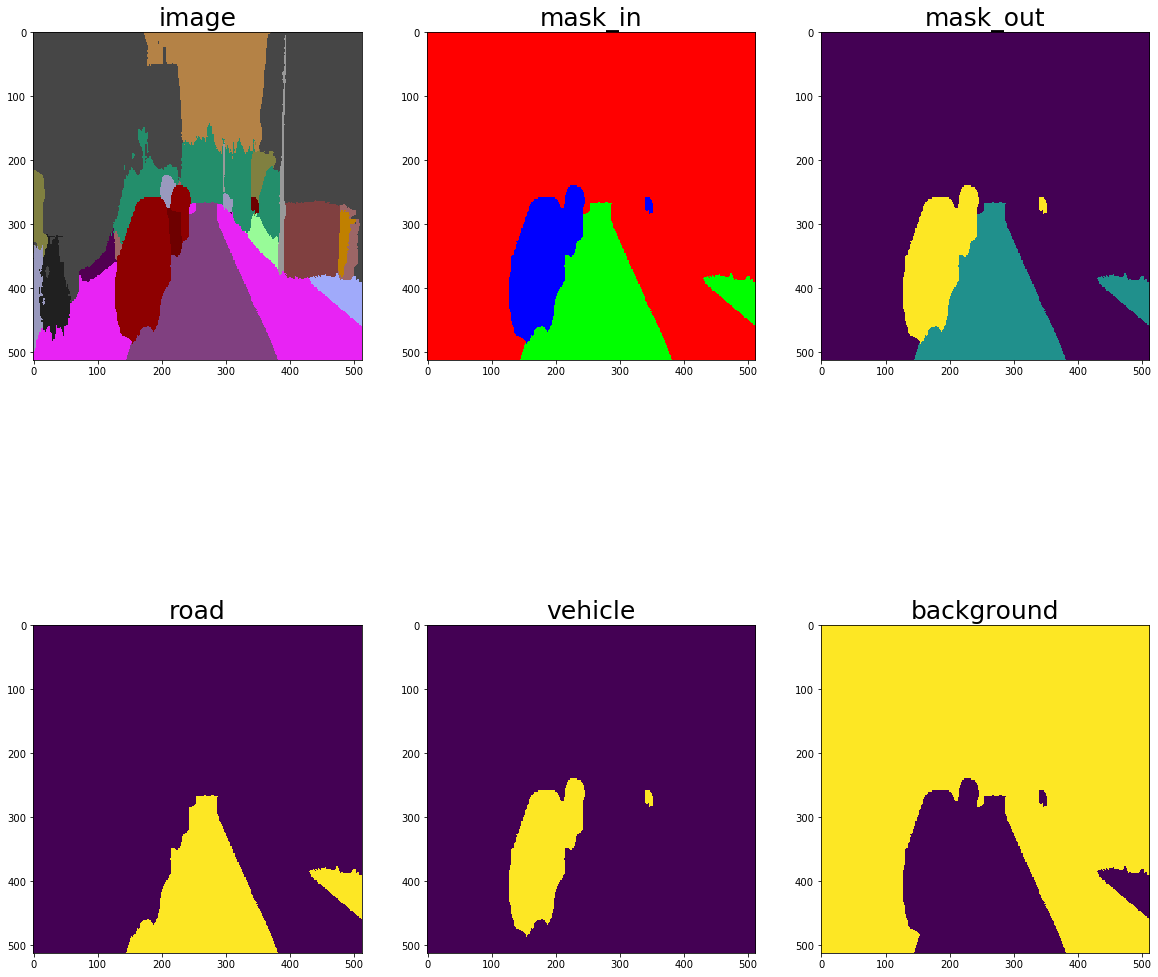

In [7]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 20, 20

print("len of dataset = {}".format(len(dataset)))

for i in range(1):
    image_classified = dataset[np.random.randint(len(dataset))]
    print('data address is ={}'.format(image_classified['addr']))

    plt.subplot(231)
    image = cv2.imread(
        os.path.dirname(image_classified['addr']) + '_rgb/' + os.path.basename(image_classified['addr']))
    image = cv2.resize(image, (crop_size, crop_size), interpolation=cv2.INTER_NEAREST)
    plt.imshow(image)
    plt.title('image', fontsize=25)

    plt.subplot(232)
    plt.imshow(image_classified['mask_in'].permute(1,2,0))
    plt.title('mask_in', fontsize=25)

    plt.subplot(233)
    plt.imshow(image_classified['mask_out'])
    plt.title('mask_out', fontsize=25)

    subplot_id = 234
    for key in image_classified['mask_per_category'].keys():
        plt.subplot(subplot_id)
        plt.imshow(torch.squeeze(image_classified['mask_per_category'][key]))
        plt.title(key, fontsize=25)
        subplot_id += 1
    plt.show()

In [4]:
crop_size = 512
selected_classes = [23, 7, 8, 21, 22, 24, 26]
class_titles = ['sky', 'road', 'side walk', 'vegetation', 'terrain', 'person', 'car']
dataset = Kitti360SemanticAllClasses(data_dir="../../Datasets/Kitti360/data_2d_semantics/train", sample_size=100,
                                     crop_size=crop_size, selected_classes= selected_classes)

print("len of dataset = {}".format(len(dataset)))

len of dataset = 100


data address is =../../Datasets/Kitti360/data_2d_semantics/train\2013_05_28_drive_0009_sync\semantic\0000004473.png


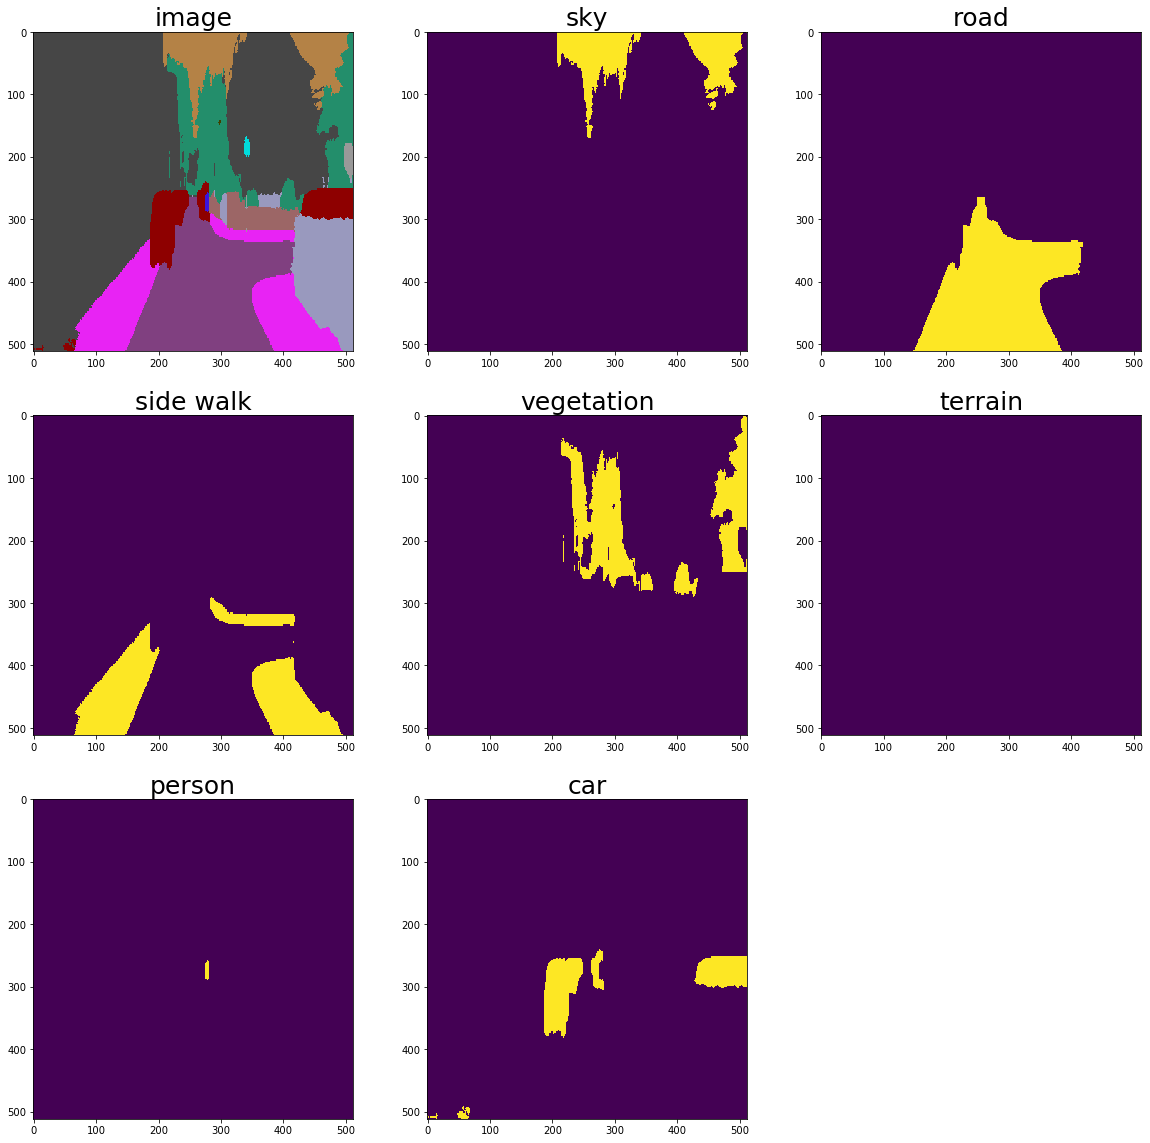

In [5]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 20 ,20

for i in range(1):
    image_classified = dataset[np.random.randint(len(dataset))]
    print('data address is ={}'.format(image_classified['addr']))

    plt.subplot(331)
    image = cv2.imread(os.path.dirname(image_classified['addr']) + '_rgb/' + os.path.basename(image_classified['addr']))
    image = cv2.resize(image, (crop_size, crop_size), interpolation=cv2.INTER_NEAREST)
    plt.imshow(image)
    plt.title('image', fontsize=25)

    subplot_id = 332
    for i, class_title in enumerate(class_titles):
        plt.subplot(subplot_id)
        plt.imshow(image_classified['mask_in'][i])
        plt.title(class_title, fontsize=25)
        subplot_id += 1
    plt.show()


